In [1]:
dofile './provider.lua'

m = require 'manifold';

In [2]:
provider = torch.load('provider.t7')

In [3]:
provider.trainData.data = provider.trainData.data:float()
provider.valData.data = provider.valData.data:float()

In [4]:
trainData = provider.trainData

In [5]:
trainData

{
  data : FloatTensor - size: 4000x3x96x96
  std_u : 13.766151323321
  mean_u : -3.9272570412993
  labels : FloatTensor - size: 4000
  size : function: 0x41cba400
  mean_v : 1.8419336072631
  std_v : 16.746470205287
}


In [6]:
indices = torch.randperm(provider.trainData.data:size(1))
indices = indices:long()

In [7]:
trainData.labels = trainData.labels:index(1, indices)
trainData.data = trainData.data:index(1, indices)

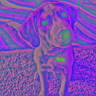

In [8]:
itorch.image(trainData.data[3])

In [9]:
x = torch.DoubleTensor(trainData.data:size()):copy(trainData.data)

In [10]:
x:size()

 4000
    3
   96
   96
[torch.LongStorage of size 4]



In [11]:
labels = trainData.labels

In [12]:
labels:size()

 4000
[torch.LongStorage of size 1]



In [13]:
X = x[{{1,100}}]
y = labels[{{1,100}}]

In [14]:
X:resize(X:size(1), X:size(2) * X:size(3) * X:size(4));

In [15]:
X:size(),y:size()

   100
 27648
[torch.LongStorage of size 2]

 100
[torch.LongStorage of size 1]



In [16]:
opts = {ndims = 2, perplexity = 30, pca = 50, use_bh = true, theta=0.5}

In [17]:
m = require 'manifold';

In [18]:
mapped_x1 = m.embedding.tsne(X, opts)

Performing preprocessing using PCA...	


/home/ubuntu/torch/install/share/lua/5.1/manifold/tsne.lua:139: attempt to index local 'f' (a nil value)
stack traceback:
	/home/ubuntu/torch/install/share/lua/5.1/manifold/tsne.lua:139: in function 'run_bhtsne'
	/home/ubuntu/torch/install/share/lua/5.1/manifold/tsne.lua:219: in function 'tsne'
	[string "mapped_x1 = m.embedding.tsne(X, opts)..."]:1: in main chunk
	[C]: in function 'xpcall'
	/home/ubuntu/torch/install/share/lua/5.1/itorch/main.lua:209: in function </home/ubuntu/torch/install/share/lua/5.1/itorch/main.lua:173>
	/home/ubuntu/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	/home/ubuntu/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	/home/ubuntu/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	/home/ubuntu/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/home/ubuntu/torch/install/share/lua/5.1/itorch/main.lua:381: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00406670: 